In [99]:
#importing libraries
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from azureml.core import Workspace, Dataset

In [100]:
from sklearn.preprocessing import LabelEncoder

In [101]:
#import dataset
df = pd.read_csv('../Dataset/raw/weather_dataset_raw.csv')

## Data preprocessing

## Data Quality assement

In [102]:
df.head()

,S_No,Timestamp,Location,Temperature_C,Apparent_Temperature_C,Humidity,Wind_speed_kmph,Wind_bearing_degrees,Visibility_km,Pressure_millibars,Weather_conditions
0,0,2006-04-01 00:00:00+02:00,"Port of Turku, Finland",9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,rain
1,1,2006-04-01 01:00:00+02:00,"Port of Turku, Finland",9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,rain
2,2,2006-04-01 02:00:00+02:00,"Port of Turku, Finland",9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,rain
3,3,2006-04-01 03:00:00+02:00,"Port of Turku, Finland",8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,NaN
4,4,2006-04-01 04:00:00+02:00,"Port of Turku, Finland",8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,rain


In [103]:
df.describe()

,S_No,Temperature_C,Apparent_Temperature_C,Humidity,Wind_speed_kmph,Wind_bearing_degrees,Visibility_km,Pressure_millibars
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,48226.000000,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,1003.235956
std,27843.727094,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,116.969906
min,0.000000,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24113.000000,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,1011.900000
50%,48226.000000,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,1016.450000
75%,72339.000000,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,1021.090000
max,96452.000000,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,1046.380000


In [104]:
df.shape

(96453, 11)

In [105]:
df.dtypes

S_No                        int64
Timestamp                  object
Location                   object
Temperature_C             float64
Apparent_Temperature_C    float64
Humidity                  float64
Wind_speed_kmph           float64
Wind_bearing_degrees        int64
Visibility_km             float64
Pressure_millibars        float64
Weather_conditions         object
dtype: object

#### Conver timestamp to datetime format


In [106]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

/var/folders/gw/08s3rj6d42b9r0fpg37yh6680000gn/T/ipykernel_4459/766710655.py:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Timestamp'] = pd.to_datetime(df['Timestamp'])


#### Checking for missing data

In [107]:
df.isnull().values.any()

np.True_

## Calibrate missing data

________________________________________________________
Quantify missingness

Before calibrating, always measure:

df.isnull().mean() * 100


Interpretation:

< 5% → simple methods OK

5–30% → advanced imputation

> 30% → consider dropping feature
________________________________________________________

In [108]:
df.isnull().mean() * 100


S_No                      0.000000
Timestamp                 0.000000
Location                  0.000000
Temperature_C             0.000000
Apparent_Temperature_C    0.000000
Humidity                  0.000000
Wind_speed_kmph           0.000000
Wind_bearing_degrees      0.000000
Visibility_km             0.000000
Pressure_millibars        0.000000
Weather_conditions        0.005184
dtype: float64

NaN or null values have only been observed in the Weather_conditions column. We
replace the NaN values by using the fillna() method from pandas and the forward
fill (ffill) method. As weather is progressive, it is likely to replicate the previous event
in the data. Hence, we use the forward fill method, which replicates the last observed
non-null value until another non-null value is encountered.

In [109]:
df['Weather_conditions'].fillna(method = 'ffill', inplace = True, axis = 0)

/var/folders/gw/08s3rj6d42b9r0fpg37yh6680000gn/T/ipykernel_4459/1453880866.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Weather_conditions'].fillna(method = 'ffill', inplace = True, axis = 0)
/var/folders/gw/08s3rj6d42b9r0fpg37yh6680000gn/T/ipykernel_4459/1453880866.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Weather_conditions'].fillna(method = 'ffill', inplace = True, axis = 0)


In [110]:
df.isnull().values.any()

np.False_

## Label Encoding

In [111]:
df['Weather_conditions'].value_counts()

Weather_conditions
rain     82271
snow     10712
clear     3470
Name: count, dtype: int64

In [112]:
# Simplify weather conditions into binary classes (rain / no_rain) 
# to align with cargo operation impact and reduce categorical complexity
df['Weather_conditions'].replace({'snow': 'no_rain', 'clear': 'no_rain'}, inplace = True)

Meaning of inplace=True

Apply the change directly to the existing DataFrame instead of creating a new one.

In [113]:
#from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = df['Weather_conditions']
y = le.fit_transform(y)
#The result is a NumPy array of integers

fit()           → learn rules

transform()     → apply rules

fit_transform() → learn + apply (together)


In [114]:
y = pd.DataFrame(data=y, columns=["Weather_condition"])
#Converts the encoded NumPy array into a Pandas DataFrame
#Assigns a meaningful column name: Weather_condition

df = pd.concat([df, y], axis=1)
#Adds the encoded column back to the original DataFrame
#axis=1 means columns are joined side by side

df.drop(['Weather_conditions'], axis=1, inplace=True)
#Removes the original categorical column
#Prevents duplication
#Final DataFrame contains only numeric encoding

In [115]:
df.head()

,S_No,Timestamp,Location,Temperature_C,Apparent_Temperature_C,Humidity,Wind_speed_kmph,Wind_bearing_degrees,Visibility_km,Pressure_millibars,Weather_condition
0,0,2006-04-01 00:00:00+02:00,"Port of Turku, Finland",9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,1
1,1,2006-04-01 01:00:00+02:00,"Port of Turku, Finland",9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,1
2,2,2006-04-01 02:00:00+02:00,"Port of Turku, Finland",9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,1
3,3,2006-04-01 03:00:00+02:00,"Port of Turku, Finland",8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,1
4,4,2006-04-01 04:00:00+02:00,"Port of Turku, Finland",8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,1


### New feature – Future_weather_condition

In [116]:
df['Future_weather_condition'] = df.Weather_condition.shift(4, axis = 0)
df.dropna(inplace=True)

In [117]:
df.head()

,S_No,Timestamp,Location,Temperature_C,Apparent_Temperature_C,Humidity,Wind_speed_kmph,Wind_bearing_degrees,Visibility_km,Pressure_millibars,Weather_condition,Future_weather_condition
4,4,2006-04-01 04:00:00+02:00,"Port of Turku, Finland",8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,1,1.0
5,5,2006-04-01 05:00:00+02:00,"Port of Turku, Finland",9.222222,7.111111,0.85,13.9587,258,14.9569,1016.66,1,1.0
6,6,2006-04-01 06:00:00+02:00,"Port of Turku, Finland",7.733333,5.522222,0.95,12.3648,259,9.9820,1016.72,1,1.0
7,7,2006-04-01 07:00:00+02:00,"Port of Turku, Finland",8.772222,6.527778,0.89,14.1519,260,9.9820,1016.84,1,1.0
8,8,2006-04-01 08:00:00+02:00,"Port of Turku, Finland",10.822222,10.822222,0.82,11.3183,259,9.9820,1017.37,1,1.0


## Data correlations and filtering

#### Note: Pearson correlation does not mean causation

Refer the file explainations_from_chatgpt.ipynb



In [118]:
df.dtypes

S_No                          int64
Timestamp                    object
Location                     object
Temperature_C               float64
Apparent_Temperature_C      float64
Humidity                    float64
Wind_speed_kmph             float64
Wind_bearing_degrees          int64
Visibility_km               float64
Pressure_millibars          float64
Weather_condition             int64
Future_weather_condition    float64
dtype: object

________________________________________________________
One subtle issue (very important)

Future_weather_condition   float64

This should ideally be int, not float.

Why is it float?

Because shift() introduced NaN

Pandas converts integer columns to float when NaNs exist

Even after dropna(), dtype may remain float64
_________________________________________________________

In [119]:
corrMatrix = df.select_dtypes(include='number').corr(method='pearson')
#Run correlation ONLY on numeric columns (mandatory)
#This automatically excludes:
#Timestamp
#Location

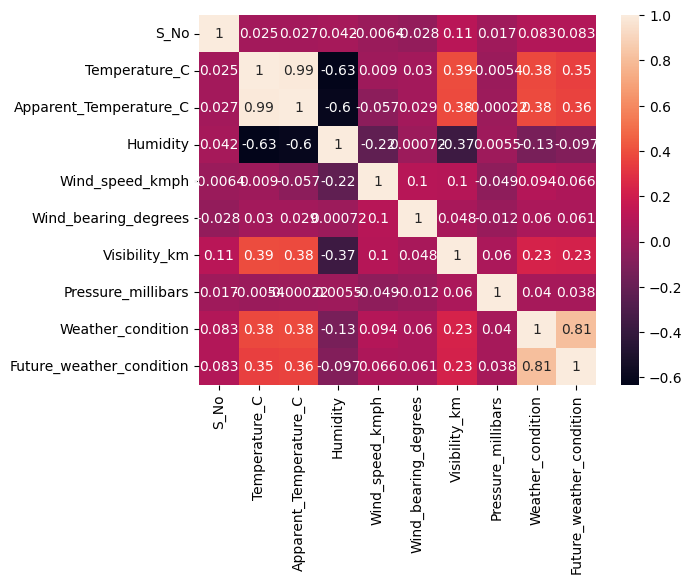

In [120]:
# Visualizing using heatmap
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [121]:
#Fix Future_weather_condition dtype
df['Future_weather_condition'] = df['Future_weather_condition'].astype(int)


In [122]:
# Filter or drop irrelevent data columns
df.drop(['S_No', 'Apparent_Temperature_C'],axis=1,inplace=True)

#From the heatmap, we can see that the Temperature and Apparent_
#Temperature_C coefficient is 0.99. S_No (Serial number) is a continuous value, which
#is more or less like an incremental index for a DataFrame and can be discarded or filtered
#out as it does not provide great value. Hence both Apparent_Temperature and S_No
#are dropped or filtered. 

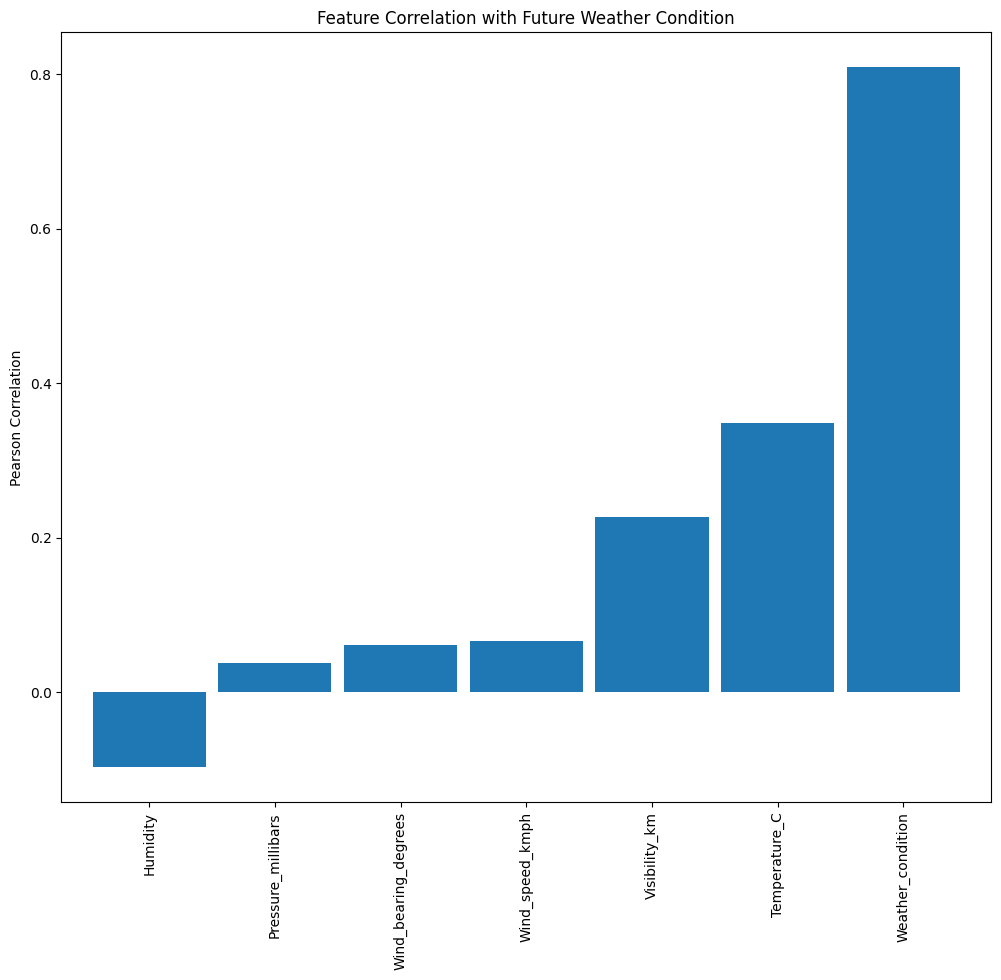

In [123]:
#Pearson correlation for Future_weather_condition
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))

numeric_df = df.select_dtypes(include='number')

numeric_df.corr(method='pearson')['Future_weather_condition'] \
    .drop('Future_weather_condition') \
    .sort_values(ascending=True) \
    .plot(kind='bar', width=0.9)

plt.title('Feature Correlation with Future Weather Condition')
plt.ylabel('Pearson Correlation')
plt.show()


In [124]:
df.head()

,Timestamp,Location,Temperature_C,Humidity,Wind_speed_kmph,Wind_bearing_degrees,Visibility_km,Pressure_millibars,Weather_condition,Future_weather_condition
4,2006-04-01 04:00:00+02:00,"Port of Turku, Finland",8.755556,0.83,11.0446,259,15.8263,1016.51,1,1
5,2006-04-01 05:00:00+02:00,"Port of Turku, Finland",9.222222,0.85,13.9587,258,14.9569,1016.66,1,1
6,2006-04-01 06:00:00+02:00,"Port of Turku, Finland",7.733333,0.95,12.3648,259,9.9820,1016.72,1,1
7,2006-04-01 07:00:00+02:00,"Port of Turku, Finland",8.772222,0.89,14.1519,260,9.9820,1016.84,1,1
8,2006-04-01 08:00:00+02:00,"Port of Turku, Finland",10.822222,0.82,11.3183,259,9.9820,1017.37,1,1


## Time series analysis of temperature


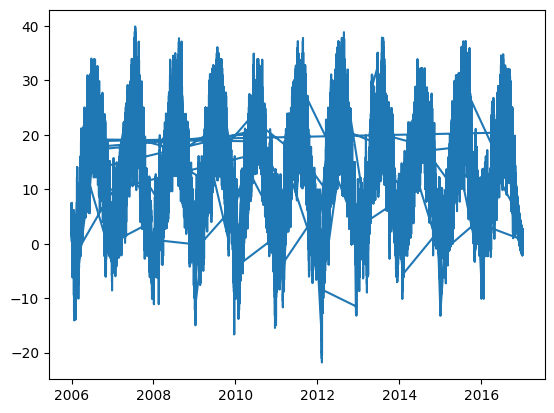

In [125]:
time = df['Timestamp']
temp = df['Temperature_C']
# plot graph
plt.plot(time, temp)
plt.show()

In [126]:
# Save processed dataset 
df.to_csv('../Dataset/processed/v1/weather_dataset_processed.csv',index=False)